<a href="https://colab.research.google.com/github/trivedidn/BNFO301_Trivedi_Disha/blob/main/BNFO_301_Week4_Disha_Trivedi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>BNFO301 Lab Assignment Week 4: Introduction to Python Regex Module</h1>

This week's assignment is designed to refresh, teach and, test your knowledge of the basics of Python regex module functions and capabilities. Students will learn how to find count, identify and replace patterns through a file of short sequence reads (Week 1/2). 

**Helpful Resources:**
1. Re (Regex) documentation- https://docs.python.org/3/library/re.html
2. Handy tool to build/test regular expression - https://regex101.com/ 
3. Tutorial - http://justinbois.github.io/bootcamp/2015/lessons/l16_regular_expressions.html

--- 
Grading: 4 point for attendance, 2 points for each 


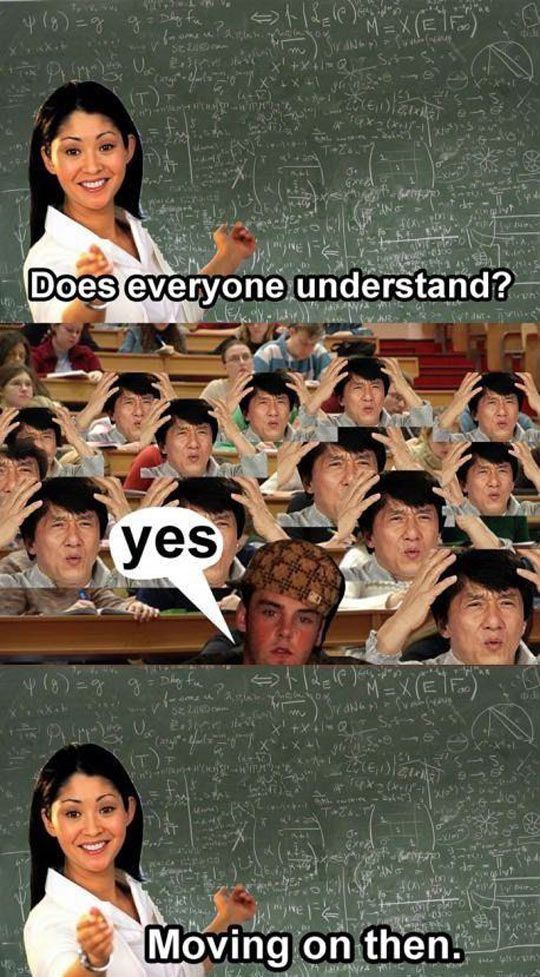



### Part 0- Setup (Provided code)
Read the Genbank Sample Data File 

In [2]:
import re # python regex module
import os.path

In [3]:
# Load the genbank file 
DATA_FILE_GITHUB = "https://raw.githubusercontent.com/MusBansal/BNFO301Data/main/genBankSample.txt"
DEFAULT_FILE_NAME = 'genBankSample.txt'

fileName = DEFAULT_FILE_NAME
#Does the file exists locally, if not get it from the github
if not os.path.exists(fileName):
  #Load the file from Github to the local folder
  !wget --no-check-certificate --content-disposition $DATA_FILE_GITHUB
   
print("Reading file:", fileName)

# Read in the string from the file
with open(fileName, "r") as myfile:
    gb_input = myfile.read()

--2022-02-10 17:42:25--  https://raw.githubusercontent.com/MusBansal/BNFO301Data/main/genBankSample.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6362 (6.2K) [text/plain]
Saving to: ‘genBankSample.txt’

genBankSample.txt   100%[===================>]   6.21K  --.-KB/s    in 0s      

2022-02-10 17:42:25 (47.0 MB/s) - ‘genBankSample.txt’ saved [6362/6362]

Reading file: genBankSample.txt


###Question 1- Counting Sequences 
Above you were provided with the sequence portion of a genbank file.  Using regular expressions, count the number of sequence “segments” in the file provided.  A segment is defined as a string of characters between white spaces. 

 

Hint: do not strip the file of white spaces before counting and look at the file to understand the format.

In [12]:

# Compile our regex search. [] - set of characters a-z, + - matches 1 or more occurences of the preceding RE 
p = re.compile('[a-z]+')

# Get a list of all the segments

list_segments = p.findall(gb_input)

#print(list_segments) & length 
count_segments = len(list_segments)
print("Total number of sequence:" , count_segments)


Total number of segments: 503


### Question 2- Finding Patterns
Using the same file from question 1, use regular expressions find and print each sequence “segment” that contains the pattern “ccga”.  Once you have found a segment containing this pattern, print the entire string.  Also print the start and stop positions of this segment in the file.  Please include all characters (including whitespaces) in your count.
___
Match: 1 "ccgacatgg" found at [78,88] <br>
... <br>
Match: n "sequence" found at [x,y] <br> <br>
Total Sequences Found: n 

In [17]:
# Compile our regex search. [] - set of characters a-z, + - matches 1 or more occurences of the preceding RE 
pattern = '[a-z]*ccga[a-z]*'

count = 0 

# create a for loop to find all of the patterns in the file, to count the number of matches, and print the matches 
for match in re.finditer(pattern, gb_input):
  count = +1 
  # Start index of match (integer)
  start_seq = match.start()

   # Final index of match (integer)
  end_seq = match.end()

  # Complete match (string)
  complete_seq = match.group()

  # Print match & total sequences
  print("match:", count, "", complete_seq, "", "found at", [start_seq, end_seq])



match: 1  ccgacatgag  found at [78, 88]
match: 1  tccttgccga  found at [589, 599]
match: 1  gacttaccga  found at [1121, 1131]
match: 1  tcagaaccga  found at [4334, 4344]
match: 1  ttccgacctt  found at [5203, 5213]


### Q 3. Search all the sequences using regular expression that contains this pattern ("cc"). And replace with the "+" . Output the sequences with the replacement to an output file. How many replacements were done? 

In [23]:
# Compile our search string

with open('HW2_Results.txt', 'w') as outfile: 
  
  pattern = re.compile('(cc)')

  list_of_sequences = pattern.findall(gb_input)
  length = len(list_of_sequences)

# Find and replace
  new_sequence = pattern.sub('+', gb_input)

#print sequence and count
  print("New Sequences:", new_sequence, "", "Total Number of Sequences Changed:", length)



#Saving it in output file

  
  # close the output file
  outfile.close 




New Sequences: 1 gat+t+at atacaacggt atct+a+t caggtttaga tctcaacaac ggaa+attg
       61 +gacatgag acagttaggt atcgtcgaga gttacaagct aaaacgagca gtagtcagct
      121 ctgcatctga ag+gctgaa gttctactaa gggtggataa catcat+gt gcaaga+aa
      181 gaa+g+aa tagacaacat atgtaacata tttaggatat a+tcgaaaa taataaa+g
      241 +acactgtc attattataa ttagaaacag aacgcaaaaa ttat+acta tataattcaa
      301 agacgcgaaa aaaaaagaac aacgcgtcat agaacttttg gcaattcgcg tcacaaataa
      361 attttggcaa cttatgtttc ctcttcgagc agtactcgag +ctgtctca agaatgtaat
      421 aata+catc gtaggtatgg ttaaagatag catct+aca a+tcaaagc t+ttg+ga
      481 gagtcg+ct +tttgtcga gtaattttca cttttcatat gagaacttat tttcttattc
      541 tttactctca cat+tgtag tgattgacac tgcaacag+ a+atcacta gaagaacaga
      601 acaattactt aatagaaaaa ttatatcttc ctcgaaacga ttt+tgctt +aacatcta
      661 cgtatatcaa gaagcattca ctta+atga cacagcttca gatttcatta ttgctgacag
      721 ctactatatc actact+at ctagtagtgg +acg+cta tgaggcatat +tatcggaa
      781 aacaata+c +cagtggca agagtcaa